In [1]:
# !pip install ipynb

In [2]:
from PIL import Image, ImageDraw, ImageEnhance, ImageFont, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.full.tools as tools
import imp 
from pylab import *
from scipy.ndimage import filters
from scipy.ndimage import measurements, morphology
import scipy.ndimage as ndimage

In [3]:
imp.reload(tools)

<module 'ipynb.fs.full.tools' (C:\Users\User\puzzler\src\tools.ipynb)>

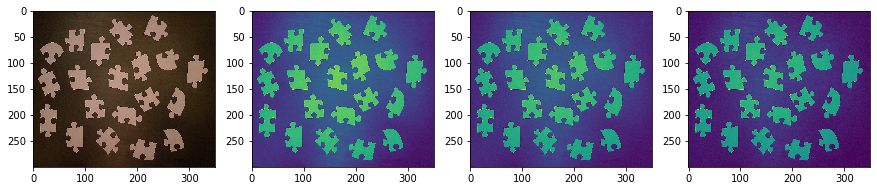

In [4]:
# Пазл монохром
origin_image_mono = np.array(Image.open("../resources/Пазл-монохром.jpg").resize((350, 300)))
tools.show_3_image(origin_image_mono)

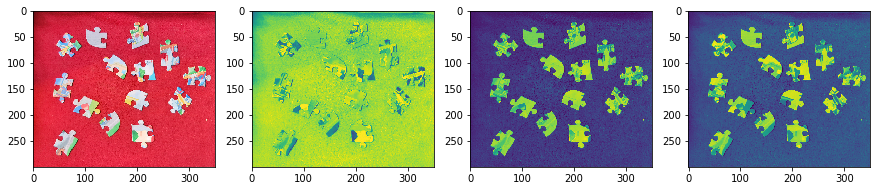

In [5]:
# Пазл Красный фон
origin_image_red = np.array(Image.open("../resources/Красный фон/Red_4.jpg").resize((350, 300)))
tools.show_3_image(origin_image_red)

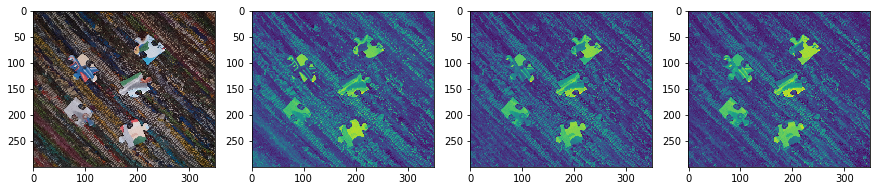

In [6]:
# Пазл Пестрый фон
origin_image_hard = np.array(Image.open("../resources/Пёстрый фон/Motley-2.jpg").resize((350, 300)))
tools.show_3_image(origin_image_hard)

#### Бинаризация

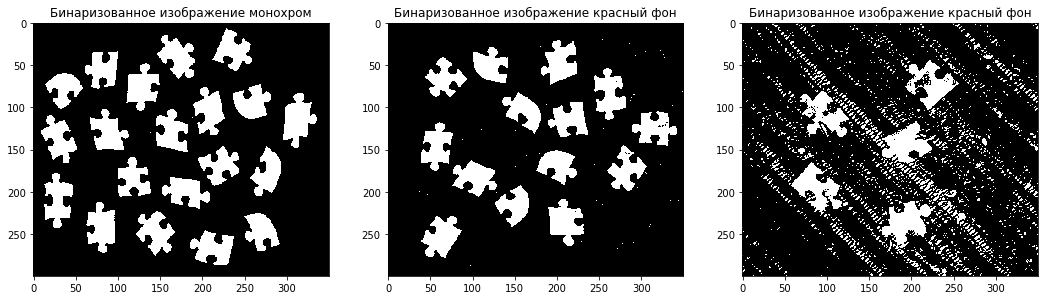

In [7]:
fig=plt.figure(figsize=(18, 18))
fig.add_subplot(1, 3, 1)
plt.title('Бинаризованное изображение монохром')
binary_image_mono = tools.binary_image(origin_image_mono, 100, 'r')
plt.imshow(binary_image_mono)
fig.add_subplot(1, 3, 2)
plt.title('Бинаризованное изображение красный фон')
binary_image_red = tools.binary_image_by_summary(origin_image_red, 95)
plt.imshow(binary_image_red)
fig.add_subplot(1, 3, 3)
plt.title('Бинаризованное изображение красный фон')
binary_image_hard = tools.binary_image_by_summary(origin_image_hard, 105)
plt.imshow(binary_image_hard)
plt.show()

#### Удаляем шум

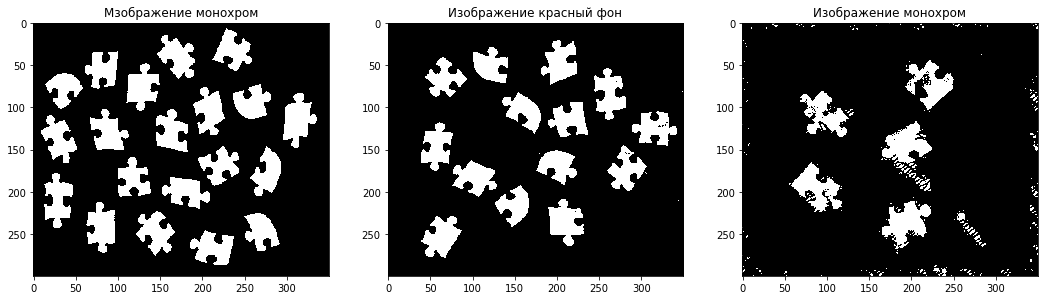

In [8]:
fig=plt.figure(figsize=(18, 18))
fig.add_subplot(1, 3, 1)
plt.title('Мзображение монохром')
binary_image_mono = tools.clear_image(binary_image_mono, 30)
plt.imshow(binary_image_mono)
fig.add_subplot(1, 3, 2)
plt.title('Изображение красный фон')
binary_image_red = tools.clear_image(binary_image_red, 30)
plt.imshow(binary_image_red)
fig.add_subplot(1, 3, 3)
plt.title('Изображение монохром')
binary_image_hard = tools.clear_image(binary_image_hard, 30)
plt.imshow(binary_image_hard)
plt.show()

#### Подсчет пазлов

Первая картинка binary_image_mono

In [9]:
print('Монохром')
puzzle_image_mono, puzzle_count_mono, puzzle_position_dict_mono = tools.find_puzzlers(binary_image_mono, 20, 20, 960)
print('Красный фон')
puzzle_image_red, puzzle_count_red, puzzle_position_dict_red = tools.find_puzzlers(binary_image_red, 20, 20, 910)
print('Пестрое')
puzzle_image_hard, puzzle_count_hard, puzzle_position_dict_hard = tools.find_puzzlers(binary_image_hard, 30, 30, 1450)

Монохром
puzzle found i= 25 j = 210 radius = 20    optim_i= 25 optim_j = 214 optim_radius = 25
puzzle found i= 30 j = 135 radius = 20    optim_i= 30 optim_j = 137 optim_radius = 25
puzzle found i= 35 j = 80 radius = 20    optim_i= 41 optim_j = 80 optim_radius = 25
puzzle found i= 75 j = 240 radius = 20    optim_i= 75 optim_j = 244 optim_radius = 25
puzzle found i= 80 j = 55 radius = 20    optim_i= 88 optim_j = 59 optim_radius = 25
puzzle found i= 80 j = 130 radius = 20    optim_i= 88 optim_j = 130 optim_radius = 25
puzzle found i= 120 j = 75 radius = 20    optim_i= 126 optim_j = 77 optim_radius = 25
puzzle found i= 120 j = 185 radius = 20    optim_i= 120 optim_j = 185 optim_radius = 25
puzzle found i= 140 j = 245 radius = 20    optim_i= 144 optim_j = 249 optim_radius = 25
puzzle found i= 160 j = 130 radius = 20    optim_i= 168 optim_j = 130 optim_radius = 25
puzzle found i= 165 j = 35 radius = 20    optim_i= 167 optim_j = 41 optim_radius = 25
puzzle found i= 175 j = 200 radius = 20    

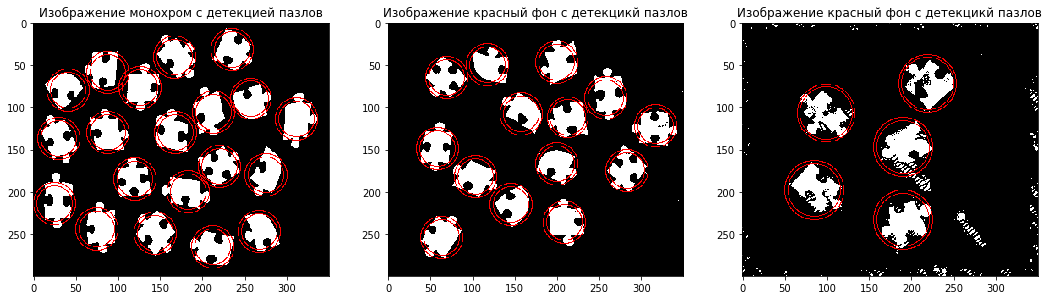

In [10]:
fig=plt.figure(figsize=(18, 18))
fig.add_subplot(1, 3, 1)
plt.title('Изображение монохром с детекцией пазлов')
plt.imshow(puzzle_image_mono)
fig.add_subplot(1, 3, 2)
plt.title('Изображение красный фон с детекцикй пазлов')
plt.imshow(puzzle_image_red)
fig.add_subplot(1, 3, 3)
plt.title('Изображение красный фон с детекцикй пазлов')
plt.imshow(puzzle_image_hard)
plt.show()

In [11]:
print('Количество пазлов монохром =', puzzle_count_mono)
print('Количество пазлов красный фон =', puzzle_count_red)
print('Количество пазлов пестрый =', puzzle_count_hard)

Количество пазлов монохром = 20
Количество пазлов красный фон = 14
Количество пазлов пестрый = 5


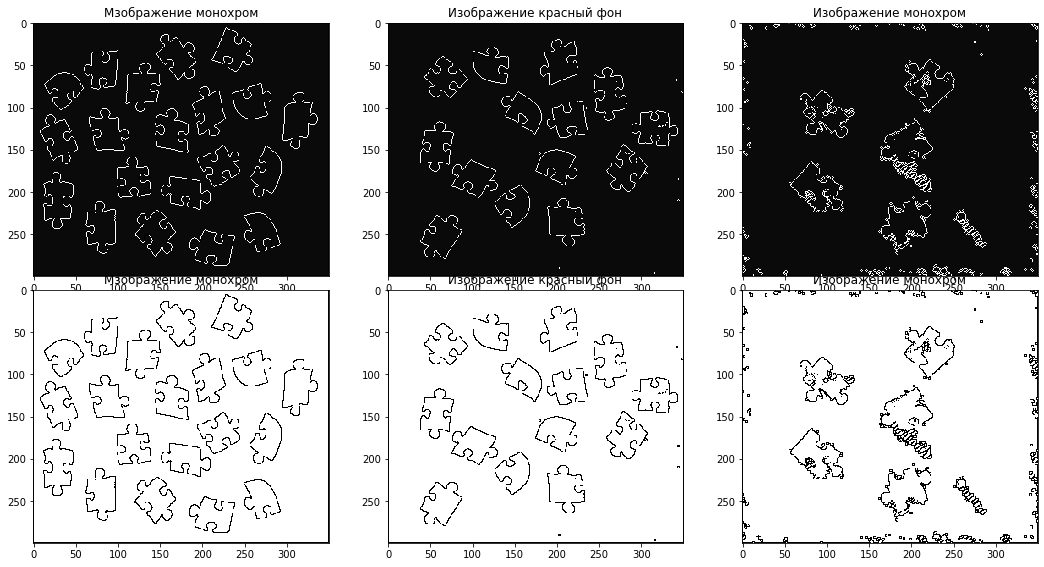

In [133]:
# Выведем контуры через опрератор Лапласса
laplassian = (
    0, 1, 0,
    1, -4, 1,
    0, 1, 0,
)

fig=plt.figure(figsize=(18, 18))
fig.add_subplot(2, 3, 1)
plt.title('Мзображение монохром')
im = binary_image_mono
plt.imshow(im.filter(ImageFilter.Kernel(size = (3, 3), kernel=laplassian, scale=1, offset=10)))
fig.add_subplot(2, 3, 2)
plt.title('Изображение красный фон')
im2 = binary_image_red
plt.imshow(im2.filter(ImageFilter.Kernel(size = (3, 3), kernel=laplassian, scale=1, offset=10)))
fig.add_subplot(2, 3, 3)
plt.title('Изображение монохром')
im3 = binary_image_hard
plt.imshow(im3.filter(ImageFilter.Kernel(size = (3, 3), kernel=laplassian, scale=1, offset=10)))

fig.add_subplot(1, 3, 1)
plt.title('Мзображение монохром')
im1 = binary_image_mono
plt.imshow(im1.filter(ImageFilter.CONTOUR))
fig.add_subplot(1, 3, 2)
plt.title('Изображение красный фон')
im2 = binary_image_red
plt.imshow(im2.filter(ImageFilter.CONTOUR))
fig.add_subplot(1, 3, 3)
plt.title('Изображение монохром')
im3 = binary_image_hard
plt.imshow(im3.filter(ImageFilter.CONTOUR))
plt.show()